In [5]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from random import randint
from time import sleep
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url1="https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=f51c42ba-4a6a-4653-831d-5b5509d9f6d6&as-searchtext=mobiles&page=1"
page=requests.get(url1,headers=headers)

In [7]:
option = webdriver.ChromeOptions()
driver = webdriver.Chrome(executable_path='/users/hari/chromedriver_win32/chromedriver')
soup = BeautifulSoup(page.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.5a191e.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/apple-touch-icon-72x72.png" rel="apple-tou

In [8]:
Products=[] 
Prices=[] 
Ratings=[] 
Reviews=[]
Memory=[]
Display=[]
Camera=[]
Battery=[]
Processor=[]
Warranty=[]
RAM=[]
ROM=[]
Expandable=[]
#driver.get(url1)

In [10]:

content = driver.page_source
soup = BeautifulSoup(content)
pages = range(1,5)
for page in pages:
    url="https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(page)
    results = requests.get(url, headers=headers)
    soup = BeautifulSoup(results.text, "html.parser")

    next_page = soup.find_all('div',attrs={'class':'_2kHMtA'})
    
    sleep(randint(2,10))
 
    for a in next_page:
        name=a.find('div', attrs={'class':'_4rR01T'})
        price=a.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=a.find('div', attrs={'class':'_3LWZlK'})
        Products.append(name.text)
        Prices.append(price.text)
        try:
            if pd.notnull(rating.text):
                Ratings.append(rating.text)
            else:
                Ratings.append('NaN')
            except:
            pass
        
        
        html_list = soup.find('ul',attrs={'class':'_1xgFaf'})
        specs = a.find('div',attrs={'class':'fMghEO'})

        for item in specs :
            detls = item.find_all('li',attrs={'class':'rgWa7D'})
            list = soup.find_all('ul',{'class':'_1xgFaf'})
            counter = 0
            Memory.append(detls[0].text)
            Display.append(detls[1].text)
            Camera.append(detls[2].text)
            Battery.append(detls[3].text)
print('appended')
driver.close()

appended


In [11]:
a = {'Product Name':Products,'Price':Prices,'Rating':Ratings,'Camera':Camera, 'Display':Display,'Memory':Memory,'Battery':Battery}

df5 = pd.DataFrame.from_dict(a, orient='index')
df5 = df5.transpose()

In [12]:
df5

,Product Name,Price,Rating,Camera,Display,Memory,Battery
0,"POCO C3 (Arctic Blue, 64 GB)","₹8,499",4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery
1,"realme C15 Qualcomm Edition (Power Blue, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery
2,"realme C15 Qualcomm Edition (Power Silver, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery
3,"realme C15 (Power Blue, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery
4,"realme C12 (Power Blue, 32 GB)","₹8,999",4.4,13MP + 2MP + 2MP | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery
...,...,...,...,...,...,...,...
187,"MOTOROLA G10 Power (Aurora Grey, 64 GB)","₹9,999",4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery
188,"MOTOROLA G10 Power (Breeze Blue, 64 GB)","₹9,999",4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery
189,"POCO M2 Pro (Two Shades of Black, 64 GB)","₹13,999",4.4,48MP + 8MP + 5MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Lithium-ion Polymer Battery
190,"realme X7 5G (Space Silver, 128 GB)","₹19,999",4.4,64MP + 8MP + 2MP | 16MP Front Camera,16.33 cm (6.43 inch) Full HD+ Display,6 GB RAM | 128 GB ROM,4310 mAh Battery


In [19]:
df5

,Product Name,Price,Rating,Camera,Display,Memory,Battery,RAM
0,"POCO C3 (Arctic Blue, 32 GB)",7499.0,4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,3 GB RAM
1,"POCO X3 (Cobalt Blue, 128 GB)",17999.0,4.4,64MP + 13MP + 2MP + 2MP | 20MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,6 GB RAM | 128 GB ROM | Expandable Upto 512 GB,6000 mAh Lithium-ion Polymer Battery,6 GB RAM
2,"POCO C3 (Matte Black, 32 GB)",7499.0,4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,3 GB RAM
3,"POCO C3 (Lime Green, 64 GB)",8499.0,4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,4 GB RAM
4,"realme C12 (Power Silver, 32 GB)",8999.0,4.4,13MP + 2MP + 2MP | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,3 GB RAM
...,...,...,...,...,...,...,...,...
91,"OPPO A12 (Black, 64 GB)",11490.0,4.4,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,4 GB RAM
92,"OPPO A12 (Flowing Silver, 32 GB)",8990.0,4.3,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,3 GB RAM
93,"OPPO A12 (Deep Blue, 64 GB)",11990.0,4.4,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,4 GB RAM
94,Nokia TA-1010/105,1146.0,4.3,800 mAh Battery,4.57 cm (1.8 inch) Display,4 MB RAM | 4 MB ROM,1 Year Manufacturer Warranty,4 MB RAM


In [13]:

#df5[RAM]=[]
df5['RAM'] = [i[0] for i in df5['Memory'].str.split('|')]


In [14]:
df5

,Product Name,Price,Rating,Camera,Display,Memory,Battery,RAM
0,"POCO C3 (Arctic Blue, 64 GB)","₹8,499",4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,4 GB RAM
1,"realme C15 Qualcomm Edition (Power Blue, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
2,"realme C15 Qualcomm Edition (Power Silver, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
3,"realme C15 (Power Blue, 64 GB)","₹10,999",4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
4,"realme C12 (Power Blue, 32 GB)","₹8,999",4.4,13MP + 2MP + 2MP | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,3 GB RAM
...,...,...,...,...,...,...,...,...
187,"MOTOROLA G10 Power (Aurora Grey, 64 GB)","₹9,999",4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery,4 GB RAM
188,"MOTOROLA G10 Power (Breeze Blue, 64 GB)","₹9,999",4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery,4 GB RAM
189,"POCO M2 Pro (Two Shades of Black, 64 GB)","₹13,999",4.4,48MP + 8MP + 5MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Lithium-ion Polymer Battery,6 GB RAM
190,"realme X7 5G (Space Silver, 128 GB)","₹19,999",4.4,64MP + 8MP + 2MP | 16MP Front Camera,16.33 cm (6.43 inch) Full HD+ Display,6 GB RAM | 128 GB ROM,4310 mAh Battery,6 GB RAM


In [15]:
df5.shape

(192, 8)

In [16]:
df5["Price"] = df5["Price"].str.replace('₹','').str.replace(',','').astype(int)
df5.iloc[:,2]=df5.iloc[:,2].astype(float)
df5.iloc[:,1]=df5.iloc[:,1].astype(float)

In [17]:
df5.dtypes


Product Name     object
Price           float64
Rating          float64
Camera           object
Display          object
Memory           object
Battery          object
RAM              object
dtype: object

In [18]:
df5

,Product Name,Price,Rating,Camera,Display,Memory,Battery,RAM
0,"POCO C3 (Arctic Blue, 64 GB)",8499.0,4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,4 GB RAM
1,"realme C15 Qualcomm Edition (Power Blue, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
2,"realme C15 Qualcomm Edition (Power Silver, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
3,"realme C15 (Power Blue, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
4,"realme C12 (Power Blue, 32 GB)",8999.0,4.4,13MP + 2MP + 2MP | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,3 GB RAM
...,...,...,...,...,...,...,...,...
187,"MOTOROLA G10 Power (Aurora Grey, 64 GB)",9999.0,4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery,4 GB RAM
188,"MOTOROLA G10 Power (Breeze Blue, 64 GB)",9999.0,4.3,48MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,4 GB RAM | 64 GB ROM,6000 mAh Battery,4 GB RAM
189,"POCO M2 Pro (Two Shades of Black, 64 GB)",13999.0,4.4,48MP + 8MP + 5MP + 2MP | 16MP Front Camera,16.94 cm (6.67 inch) Full HD+ Display,6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Lithium-ion Polymer Battery,6 GB RAM
190,"realme X7 5G (Space Silver, 128 GB)",19999.0,4.4,64MP + 8MP + 2MP | 16MP Front Camera,16.33 cm (6.43 inch) Full HD+ Display,6 GB RAM | 128 GB ROM,4310 mAh Battery,6 GB RAM


In [19]:
df5.to_csv('e:\product_list.csv')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('e:\product_list.csv')

In [22]:
data.dtypes

Unnamed: 0        int64
Product Name     object
Price           float64
Rating          float64
Camera           object
Display          object
Memory           object
Battery          object
RAM              object
dtype: object

In [40]:
data.shape

(91, 8)

In [24]:
data.head()

,Unnamed: 0,Product Name,Price,Rating,Camera,Display,Memory,Battery,RAM
0,0,"POCO C3 (Arctic Blue, 64 GB)",8499.0,4.3,13MP + 2MP + 2MP | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-ion Polymer Battery,4 GB RAM
1,1,"realme C15 Qualcomm Edition (Power Blue, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
2,2,"realme C15 Qualcomm Edition (Power Silver, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
3,3,"realme C15 (Power Blue, 64 GB)",10999.0,4.4,13MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,4 GB RAM
4,4,"realme C12 (Power Blue, 32 GB)",8999.0,4.4,13MP + 2MP + 2MP | 5MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium-ion Battery,3 GB RAM


In [42]:
data.tail()

,Product Name,Price,Rating,Camera,Display,Memory,Battery,RAM
86,"OPPO A12 (Black, 64 GB)",11490,4.4,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,4 GB RAM
87,"OPPO A12 (Flowing Silver, 32 GB)",8990,4.3,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,3 GB RAM
88,"OPPO A12 (Deep Blue, 64 GB)",11990,4.4,13MP + 2MP | 5MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,4230 mAh Battery,4 GB RAM
89,Nokia TA-1010/105,1146,4.3,800 mAh Battery,4.57 cm (1.8 inch) Display,4 MB RAM | 4 MB ROM,1 Year Manufacturer Warranty,4 MB RAM
90,"GIONEE Max Pro (Blue, 32 GB)",6999,4.3,13MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,6000 mAh Lithium Polymer Battery,3 GB RAM


In [25]:
data.isnull().sum()

Unnamed: 0      0
Product Name    0
Price           0
Rating          0
Camera          0
Display         0
Memory          0
Battery         0
RAM             0
dtype: int64

In [26]:
data.isna().sum()

Unnamed: 0      0
Product Name    0
Price           0
Rating          0
Camera          0
Display         0
Memory          0
Battery         0
RAM             0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    192 non-null    int64  
 1   Product Name  192 non-null    object 
 2   Price         192 non-null    float64
 3   Rating        192 non-null    float64
 4   Camera        192 non-null    object 
 5   Display       192 non-null    object 
 6   Memory        192 non-null    object 
 7   Battery       192 non-null    object 
 8   RAM           192 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 13.6+ KB


In [28]:
data.describe()

,Unnamed: 0,Price,Rating
count,192.000000,192.000000,192.000000
mean,95.500000,12519.833333,4.353646
std,55.569776,7550.568325,0.094825
min,0.000000,5499.000000,4.100000
25%,47.750000,8999.000000,4.300000
50%,95.500000,10999.000000,4.400000
75%,143.250000,12999.000000,4.400000
max,191.000000,46999.000000,4.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000149846ED460>,
      dtype=object)

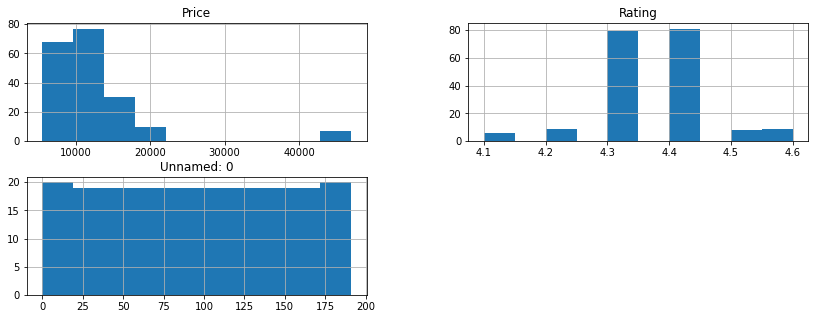

In [29]:
data.hist(figsize=(14,5))

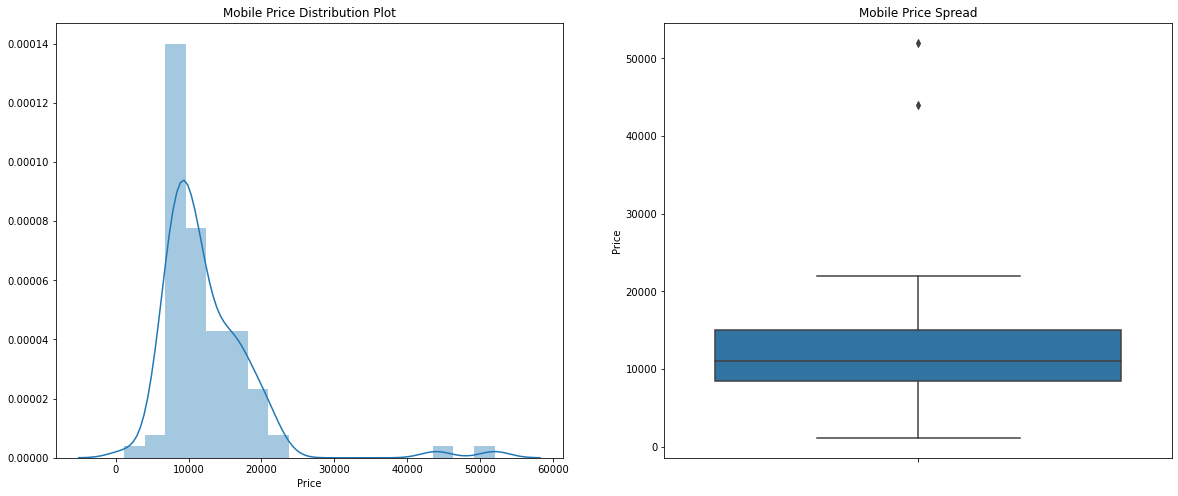

In [48]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Mobile Price Distribution Plot')
sns.distplot(data.Price)

plt.subplot(1,2,2)
plt.title('Mobile Price Spread')
sns.boxplot(y=data.Price)

plt.show()

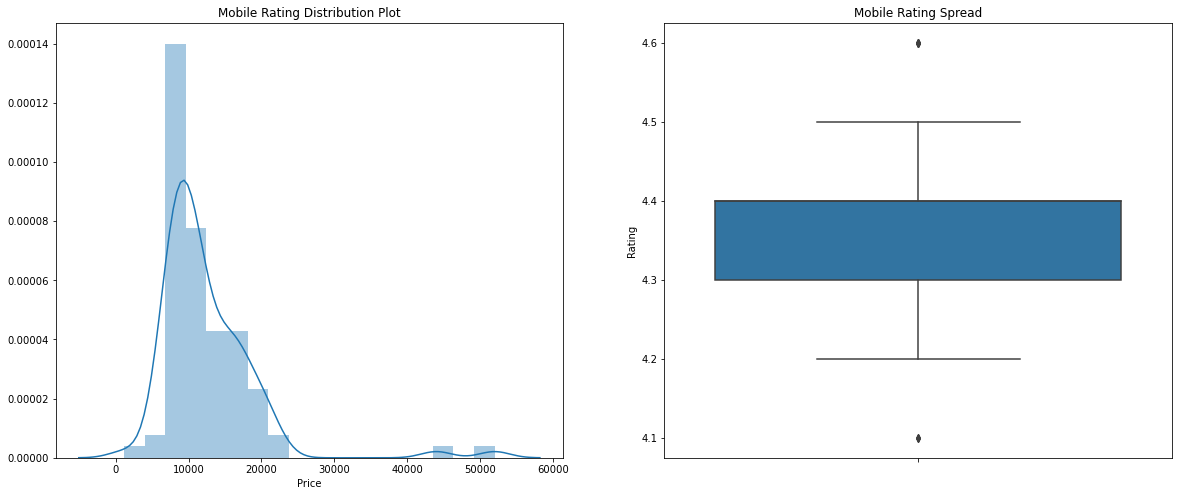

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Mobile Rating Distribution Plot')
sns.distplot(data.Price)

plt.subplot(1,2,2)
plt.title('Mobile Rating Spread')
sns.boxplot(y=data.Rating)

plt.show()

In [50]:
print(data.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count       91.000000
mean     12519.703297
std       6888.060662
min       1146.000000
25%       8499.000000
50%      10999.000000
75%      14999.000000
85%      16999.000000
90%      19999.000000
100%     51999.000000
max      51999.000000
Name: Price, dtype: float64


Averged pricw ofa phone is around Rs 10,000

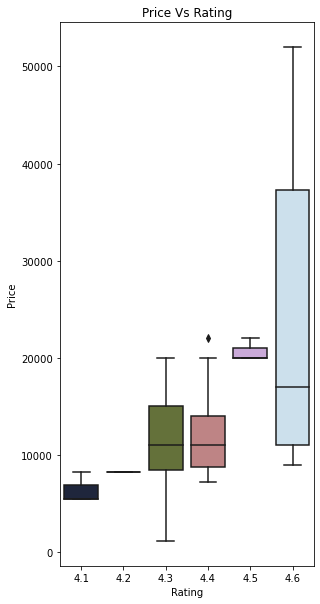

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,2)
plt.title('Price Vs Rating')
sns.boxplot(x=data.Rating, y=data.Price, palette=("cubehelix"))

plt.show()

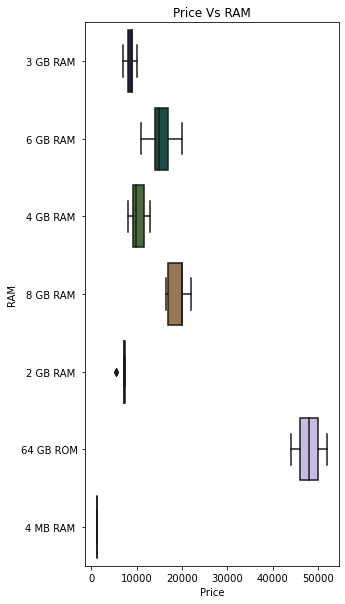

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,2)
plt.title('Price Vs RAM')
sns.boxplot(x=data.Price, y=data.RAM, palette=("cubehelix"))

plt.show()